importとか諸々

In [60]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

データの読み込み

In [61]:
test = pd.read_csv('test.csv')
year1 = pd.read_csv('year1.csv')
year2 = pd.read_csv('year2.csv')
year3 = pd.read_csv('year2.csv')
year4 = pd.read_csv('year2.csv')

欠損値を0こ以上含むデータの確認

In [62]:
print(test.isnull().sum()[test.isnull().sum()>0].sort_values(ascending=False))
print(year1.isnull().sum()[year1.isnull().sum()>0].sort_values(ascending=False))
print(year2.isnull().sum()[year2.isnull().sum()>0].sort_values(ascending=False))
print(year3.isnull().sum()[year3.isnull().sum()>0].sort_values(ascending=False))
print(year4.isnull().sum()[year4.isnull().sum()>0].sort_values(ascending=False))

Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)


データをまとめる

In [63]:
all_data = pd.concat([year1,year2,year3,year4])

In [ ]:
all_data.head(50)

含まれているstrの処理

In [65]:
for i in all_data:
  all_data[i] = pd.to_numeric(all_data[i],errors='coerce')
all_data = all_data.fillna(all_data.median())

In [66]:
for i in test:
  test[i] = pd.to_numeric(test[i],errors='coerce')
test = test.fillna(test.median())

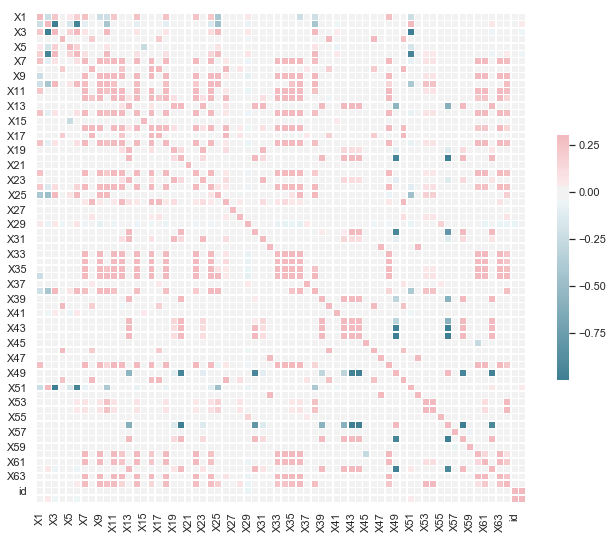

In [67]:
sns.set(style="white")
 
 
# Compute the correlation matrix
corr = all_data.corr()
 
 
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
 
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
 
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
 
plt.show()

In [68]:
all_data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,id,TARGET
count,37546.000000,37546.000000,37546.000000,37546.000000,3.754600e+04,37546.000000,37546.000000,37546.000000,37546.000000,37546.000000,...,37546.000000,3.754600e+04,37546.000000,3.754600e+04,37546.000000,3.754600e+04,37546.000000,37546.000000,37546.000000,37546.000000
mean,0.041502,0.630707,0.080067,3.855032,-1.666499e+02,-0.079504,0.157969,8.499058,3.369490,0.621517,...,0.000820,3.996060e+01,2.518272,3.687456e+02,16.633905,1.611639e+03,10.626348,82.952092,4791.601902,0.039179
std,2.214489,6.397045,6.377879,46.927343,1.750476e+04,6.474070,6.909319,259.904937,97.677451,15.827120,...,11.203428,5.747964e+03,214.734346,1.554346e+04,289.394515,1.400602e+05,210.841062,2603.811792,2856.020775,0.194022
min,-256.890000,-72.162000,-479.960000,0.000000,-2.722100e+06,-508.410000,-189.560000,-141.410000,-0.612590,-479.910000,...,-979.250000,-4.549700e+00,-327.970000,0.000000e+00,-0.007521,-9.921400e+02,-0.367890,-10677.000000,0.000000,0.000000
25%,0.003113,0.281283,0.014743,1.035700,-4.903250e+01,0.000000,0.005968,0.405067,1.028800,0.281835,...,0.016896,8.708600e-01,0.000000,5.920675e+00,4.722700,4.098600e+01,3.166825,2.373125,2346.000000,0.000000
50%,0.055006,0.486510,0.187950,1.520000,-2.560200e+00,0.000000,0.066661,1.006100,1.265800,0.491000,...,0.136290,9.475700e-01,0.008670,1.028200e+01,6.997200,6.941600e+01,5.230100,4.548800,4693.000000,0.000000
75%,0.145135,0.700180,0.392927,2.682100,4.856400e+01,0.089862,0.170378,2.473000,2.235200,0.698060,...,0.317850,9.912200e-01,0.253085,2.069525e+01,11.003500,1.140200e+02,8.869100,10.203000,7043.750000,0.000000
max,94.280000,480.960000,5.502200,4881.600000,9.909000e+05,303.670000,649.230000,18554.000000,9742.300000,1099.500000,...,147.190000,1.108300e+06,23853.000000,2.137800e+06,26862.000000,2.501600e+07,23454.000000,294770.000000,10172.000000,1.000000


Xとyの決定

In [69]:
X = all_data.iloc[:, 0:-2]
test_X = test.iloc[:,0:-1]

In [70]:
y = all_data.loc[:, 'TARGET']

In [71]:
scaler = StandardScaler()
scaler.fit_transform(X)

array([[ 0.07182261, -0.03926815,  0.04960075, ..., -0.01091675,
        -0.02945646, -0.02900571],
       [ 0.07569263, -0.0204514 ,  0.06149201, ..., -0.01074045,
        -0.03427437, -0.00843586],
       [ 0.09354801,  0.0101944 ,  0.02933041, ..., -0.01054824,
        -0.03750671, -0.02985827],
       ...,
       [-0.01192605, -0.01142993, -0.05717756, ..., -0.01069118,
        -0.03524763, -0.03092891],
       [-0.01989467, -0.02500357,  0.05392826, ..., -0.01104788,
        -0.0234732 , -0.02210369],
       [-0.01780572,  0.04884245, -0.0336804 , ..., -0.01013242,
        -0.0414078 , -0.02841867]])

データを分割

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

スタッキングを実装

In [ ]:
models = {
    ("RandomForest", RandomForestClassifier()),
    ("GradientBoosting", GradientBoostingClassifier()),
    ("NeuralNetwork", MLPClassifier(max_iter = 10000,)),
    ("AdaBoost", AdaBoostClassifier())
    ("SVM", AVC(kernel='linear'))
    }
for name, model in models:
    acc = accuracy_score(y_test, model.fit(X_train, y_train).predict(X_test))
    print("Accuracy of", name, ":", acc)

In [74]:
from sklearn.ensemble import StackingClassifier
acc = accuracy_score(y_test, stacking.fit(X_train, y_train).predict(X_test))
print("Accuracy of Stacking :", acc)

NameError: name 'stacking' is not defined

csvに出力

In [ ]:
submission = pd.DataFrame({'id': test['id'], 'TARGET': pred})
submission.to_csv('submission.csv', index=False)